# UNIX Commands for Data Scientists 

## Declare Filename

In [4]:
!ls .

'Intro Notebook.ipynb'	 temp.txt
 shakespeare.txt	'UNIX Commands for Data Scientists .ipynb'


In [5]:
filename = "shakespeare.txt"
!echo $filename
print(filename)

shakespeare.txt
shakespeare.txt


## head

In [6]:
!head -n 3 $filename

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. 
The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. 
Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).


## tail

In [7]:
!tail -n 3 $filename

If you are going to use a passage of Lorem Ipsum, you need to be sure there isn't anything embarrassing hidden in the middle of text. 
All the Lorem Ipsum generators on the Internet tend to repeat predefined chunks as necessary, making this the first true generator on the Internet. It uses a dictionary of over 200 Latin words, combined with a handful of model sentence structures, to generate Lorem Ipsum which looks reasonable. The generated Lorem Ipsum is therefore always free from repetition, injected humour, or non-characteristic words etc.
All the Lorem Ipsum generators on the Internet tend to repeat predefined chunks as necessary, making this the first true generator on the Internet. It uses a dictionary of over 200 Latin words, combined with a handful of model sentence structures, to generate Lorem Ipsum which looks reasonable. The generated Lorem Ipsum is therefore always free from repetition, injected humour, or non-characteristic words etc.

## count
*display number of characters*

In [8]:
!wc $filename

   6  289 1782 shakespeare.txt


In [9]:
!wc -l $filename

6 shakespeare.txt


## cat

In [10]:
!cat $filename | wc -l

6


## grep
*display all the line which contain a given string*

In [11]:
!grep -i "more-or-less" $filename

The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. 


*output matching pattern one per line and then count number of lines*

In [12]:
!cat $filename | grep -o "more-or-less" | wc -l

1


## sed

*replace a substring by another one in a given file*

In [13]:
!sed -e "s/more-or-less/less/g" $filename > temp.txt

In [14]:
!grep -i "less" temp.txt

The point of using Lorem Ipsum is that it has a less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. 


## sort

In [15]:
!head -n 3 $filename

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. 
The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. 
Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).


In [16]:
!head -n 3 $filename | sort

It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. 
Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).
The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. 


In [17]:
# columns seperated by ' ', sort on column 2 (-k2), case insensitive (-f)
!head -n 5 $filename | sort -f -t ' ' -k2  

There are many variations of passages of Lorem Ipsum available, but the majority have suffered alteration in some form, by injected humour, or randomised words which don't look even slightly believable. 
Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).
It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. 
The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. 
If you are going to use a passage of Lorem Ipsum, you need to be sure there isn't anything embarrassing hidden in the middle of text. 


In [18]:
!sort $filename | wc -l

7


In [19]:
!sort $filename | uniq | wc -l

6


In [20]:
# uniq command for getting unique records using -u option
!sort $filename | uniq -u| wc -l

5


# Lets bring all together

## Count most frequent word in the text UNIX

In [37]:
!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -n 15

     13 the
     11 of
     10 Lorem
     10 a
      9 Ipsum
      7 to
      5 on
      4 is
      4 as
      4 
      3 words
      3 which
      3 The
      3 over
      3 or


## Write the output to a file

In [45]:
!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -n 15 > count_vs_words

In [46]:
!cat count_vs_words

     13 the
     11 of
     10 Lorem
     10 a
      9 Ipsum
      7 to
      5 on
      4 is
      4 as
      4 
      3 words
      3 which
      3 The
      3 over
      3 or


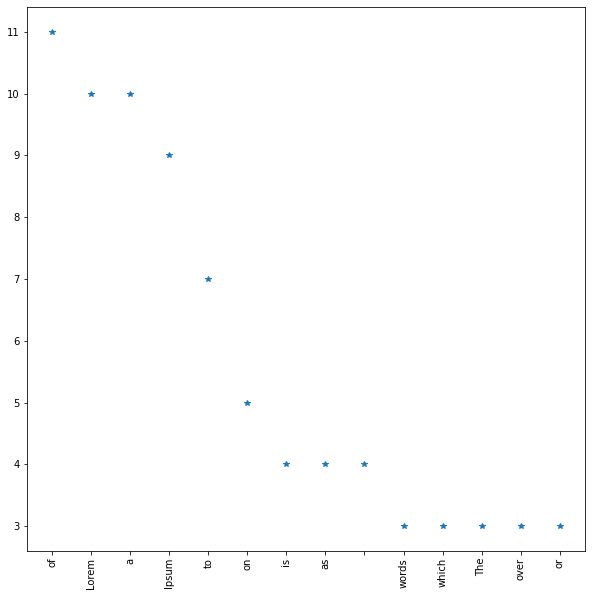

In [47]:
import matplotlib.pyplot as plt
import csv

xTricks = []
y = []

with open('count_vs_words', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        y.append(int(row[-2]))
        xTricks.append(str(row[-1]))
        
#remove the count of spaces (first line)
y = y[1:]
xTricks = xTricks[1:]
#plots
x = range(len(y))
plt.figure(figsize=(10,10))
plt.xticks(x, xTricks, rotation=90) #xlabel with 90 degree angle
plt.plot(x,y,'*')
plt.show()